In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('D:\ML\HW5\Q3_winequalityN.csv')

In [3]:
cols_na = data.isna().sum()>0

In [7]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']
for col in cols:
    data[col].fillna(value=data[col].mean(), inplace=True)

In [8]:
data.isna().sum()>0

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [24]:
y = data['type']
X = data.drop('type',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Part A

<b>Forward selection is a feature selection algorithm used in machine learning and statistical modeling. It is a greedy algorithm that starts with an empty set of features and adds one feature at a time until a set of features that optimally explain the response variable is obtained. The feature to be added at each step is the one that results in the largest increase in the model's performance. This algorithm is mainly used in regression problems.</b>

In [25]:
def seq_forward_selection(X_train, X_test, y_train, y_test):
    columns = list(X_train.columns.copy())
    length = len(columns)
    

    selected_cols = []

    answer = []
    for i in range(length):

        preds = []
        for col in columns:
            try:
                selected_cols.append(col)
                X_train_new = X_train[selected_cols]
                clf = GaussianNB()
                clf.fit(X_train_new, y_train)
                pred_score = clf.score(X_test[selected_cols] , y_test)
                preds.append(pred_score)
                selected_cols.pop()
            except:
                pass
        
        best_index = np.argmax(preds)
        next_best_feature = columns.pop(best_index)
        answer.append((next_best_feature , preds[best_index] ))
        selected_cols.append(next_best_feature)
#         print(answer[-1])
#         print(selected_cols)
        
    return answer

In [26]:
l = seq_forward_selection(X_train, X_test, y_train, y_test)

In [27]:
features = [i[0] for i in l]
accuracy = [i[1] for i in l]

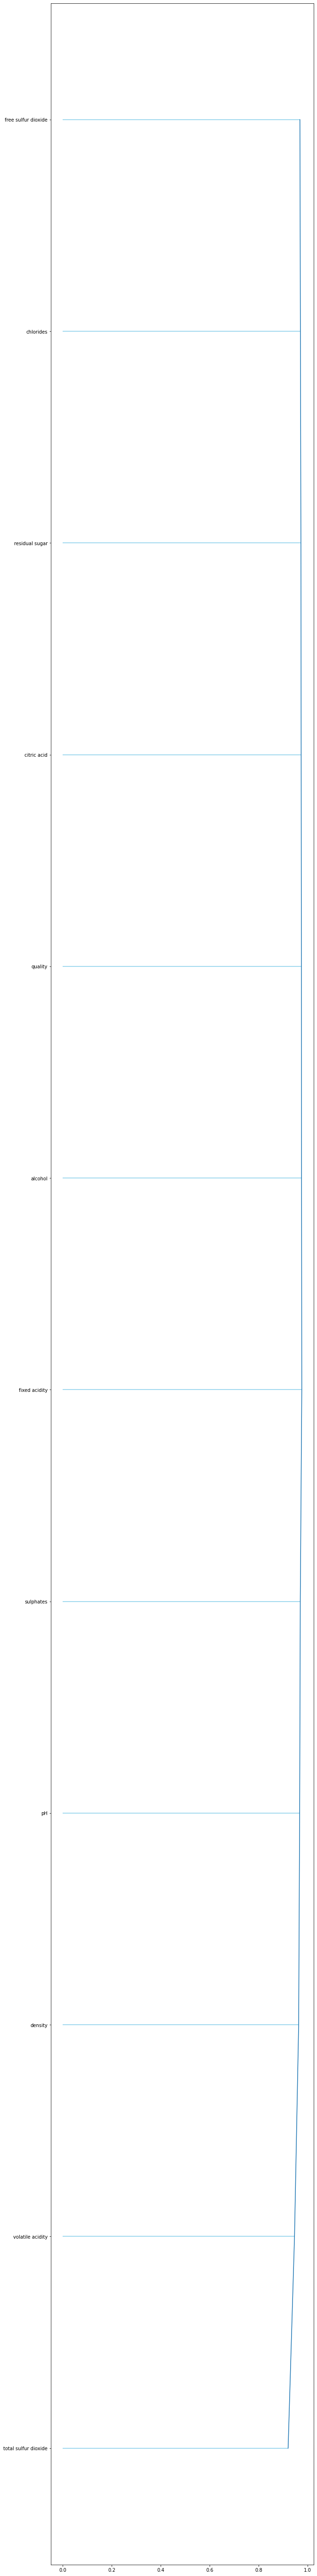

In [30]:
plt.figure(figsize=(10,100))
# plt.xlim(.6,.75)
plt.hlines(y=features, xmin=0, xmax=accuracy, color='skyblue')
plt.plot(accuracy,features)

# Part B

<b>Recursive Feature Elimination (RFE) is a feature selection algorithm used in machine learning and statistical modeling. It is a recursive process that starts with all features and removes the least important feature iteratively until the desired number of features is obtained. The feature importance is determined using a model such as linear regression, decision trees, or support vector machines. RFE is useful for eliminating redundant or irrelevant features and improving the performance of the model.</b>

In [31]:
def seq_backward_selection(X_train, X_test, y_train, y_test):
    columns = list(X_train.columns.copy())
    length = len(columns)
    


    answer = []
    for i in range(length - 2):
        preds = {}
        selected_cols = columns.copy()

        for col in columns:
            try:
                selected_cols.remove(col)
                X_train_new = X_train[selected_cols]
                clf = GaussianNB()
                clf.fit(X_train_new, y_train)
                pred_score = clf.score(X_test[selected_cols] , y_test)
                preds[col] = pred_score
                selected_cols.append(col)
            except:
                break
        best_to_remove = max(preds, key=preds.get)
        columns.remove(best_to_remove)
        answer.append((best_to_remove , preds[best_to_remove] ))
        print(i)
        print(answer[-1])
        
    return answer

In [32]:
l = seq_backward_selection(X_train, X_test, y_train, y_test)

0
('free sulfur dioxide', 0.9707692307692307)
1
('chlorides', 0.9728205128205129)
2
('residual sugar', 0.9738461538461538)
3
('citric acid', 0.9748717948717949)
4
('quality', 0.9753846153846154)
5
('alcohol', 0.9764102564102564)
6
('fixed acidity', 0.9702564102564103)
7
('sulphates', 0.9676923076923077)
8
('pH', 0.9635897435897436)
9
('density', 0.9466666666666667)


In [33]:
features = [i[0] for i in l]
accuracy = [i[1] for i in l]

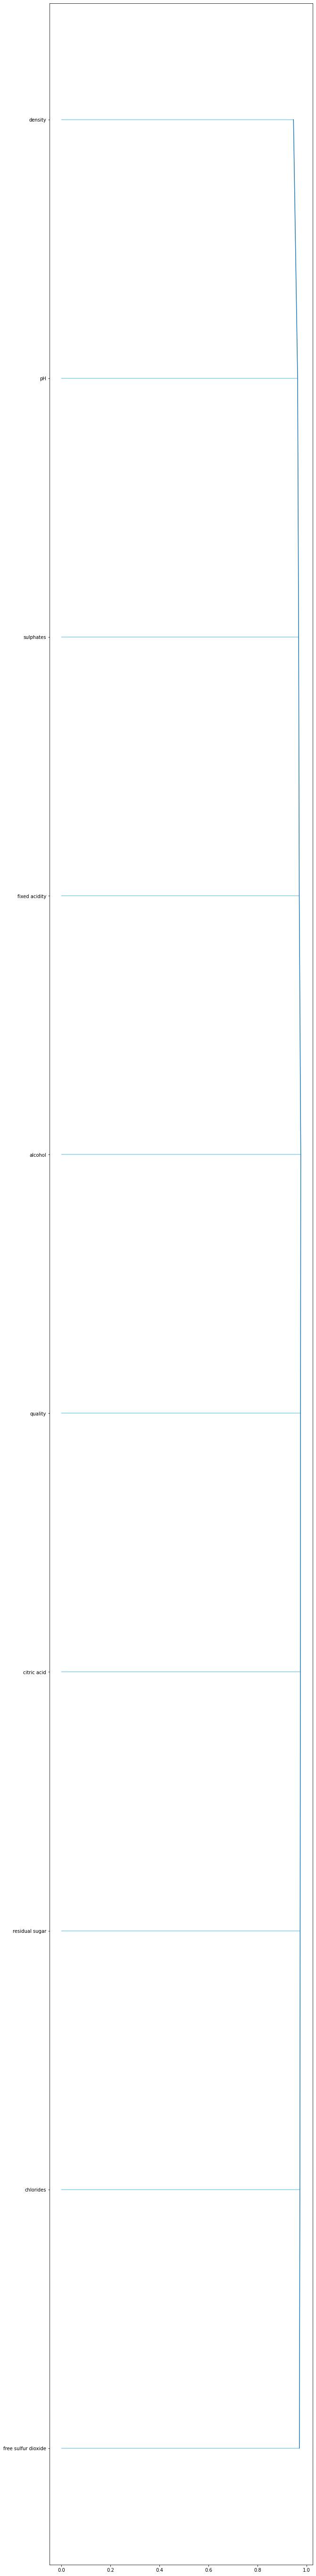

In [34]:
plt.figure(figsize=(10,100))
# plt.xlim(.6,.75)
plt.hlines(y=features, xmin=0, xmax=accuracy, color='skyblue')
plt.plot(accuracy,features)

# Part C

<b>The backward method is generally the preferred method, because the forward method produces so-called suppressor effects. These suppressor effects occur when predictors are only significant when another predictor is held constant. This means some predictors that are not good will be selected In previous iteration and won’t be removed until the end.Forward Selection seems to work faster than Backward Elimination. But it has worse performance.</b>